# Deep learning library: version 1.0 

In [64]:
import sys
sys.path.append('../../mlrefined_libraries')

# import custom library
from deeplearning_library_v1 import superlearn_setup
from deeplearning_library_v1 import unsuperlearn_setup

# define path to datasets
datapath = '../../mlrefined_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# plotting utilities
import matplotlib.pyplot as plt
from matplotlib import gridspec

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# automatically refresh if anything has changed in a backend file
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Introduction

Welcome to version 1.0 of your deep learning library!  This notebook illustrates the functionality of the files located in the directory 

``deeplearning_library_v1``

located in the same directory as this Jupyter notebook.

This library contains a single .py file for each fundamental building block of a machine learning / deep learning system we have learned about so far in class.  These are

1) `optimizers.py` - this contains a list of optimizers used for parameter tuning (currently it contains gradient descent only!)


2) `multilayer_perceptron.py` - a file for quickly creating multilayer perceptron `feature_transforms` and initializations, as detailed in Section 12.1 of the notes


3)  `normalizers.py` - containing normalization schemes which are key speeding up optimization


4)  `cost_functions.py` - containing various cost functions for regression, classification, counting misclassifications, and the autoencoder


5) `history_plotters.py` - utility for plotting cost function / misclassification histories 


6)  `superlearn_setup.py` and `unsuperlearn_setup.py` - two wrappers that 'connect all the wires' and allow easy access to all of the above functionality, for runs of supervised and unsupervised learning

We will walk through how to use the library via the examples for regression, classification, and principal component analysis below.

## 1.1 Regression examples

Load in a test dataset. 

In [138]:
csvname = datapath + 'convnet_datasets/feat_face_data.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:,:-1].T
y = data[:,-1:].T

Import an instance of the supervised learning wrapper.

In [202]:
# import the v1 library
demo = superlearn_setup.Setup(x,y)

Choose your multilayer feature transformation.

In [203]:
# choose features
demo.choose_features(name = 'multilayer_perceptron',layer_sizes = [784,10,10,10,10,1], activation = 'tanh')

Choose your normalizer.

In [204]:
# choose normalizer
demo.choose_normalizer(name = 'standard')

Choose your cost.

In [205]:
# choose cost
demo.choose_cost(name = 'softmax')

Run the optimizer.

In [206]:
# fit an optimization
demo.fit(max_its = 5,alpha_choice = 10**(-1),version='normalized')

[[array([[ 0.13654327,  0.05465472,  0.00607077, ..., -0.12560195,
        -0.02151363, -0.02992899],
       [ 0.07028018, -0.00871942,  0.00989946, ...,  0.00223361,
         0.20760271, -0.11082025],
       [ 0.0370051 ,  0.0902555 ,  0.01078046, ...,  0.1131746 ,
        -0.08331315,  0.25810481],
       ..., 
       [-0.0882564 , -0.02112032, -0.02359928, ...,  0.07105921,
        -0.15310604,  0.1071675 ],
       [-0.00682257,  0.31058375,  0.2552391 , ..., -0.11056427,
        -0.03018706,  0.00168911],
       [ 0.16442313, -0.03198426,  0.02995715, ..., -0.08854249,
         0.01971476, -0.00283137]]), array([[ -1.04808110e-01,  -9.35137403e-02,  -1.94306404e-02,
         -2.15728262e-02,  -5.47269723e-02,  -6.62184734e-02,
          1.40263380e-02,   1.18436024e-01,  -6.04674381e-02,
         -4.99310031e-02],
       [ -1.35158661e-02,  -1.44241909e-02,   9.12186348e-02,
          2.63479017e-02,   1.71790723e-01,   1.06012103e-02,
         -8.26863576e-02,  -1.55401120e-02,  -

In [207]:
demo.fit(max_its = 5,alpha_choice = 10**(-1),version='unnormalized')

[[array([[ 0.13654327,  0.05465472,  0.00607077, ..., -0.12560195,
        -0.02151363, -0.02992899],
       [ 0.07028018, -0.00871942,  0.00989946, ...,  0.00223361,
         0.20760271, -0.11082025],
       [ 0.0370051 ,  0.0902555 ,  0.01078046, ...,  0.1131746 ,
        -0.08331315,  0.25810481],
       ..., 
       [-0.0882564 , -0.02112032, -0.02359928, ...,  0.07105921,
        -0.15310604,  0.1071675 ],
       [-0.00682257,  0.31058375,  0.2552391 , ..., -0.11056427,
        -0.03018706,  0.00168911],
       [ 0.16442313, -0.03198426,  0.02995715, ..., -0.08854249,
         0.01971476, -0.00283137]]), array([[ -1.04808110e-01,  -9.35137403e-02,  -1.94306404e-02,
         -2.15728262e-02,  -5.47269723e-02,  -6.62184734e-02,
          1.40263380e-02,   1.18436024e-01,  -6.04674381e-02,
         -4.99310031e-02],
       [ -1.35158661e-02,  -1.44241909e-02,   9.12186348e-02,
          2.63479017e-02,   1.71790723e-01,   1.06012103e-02,
         -8.26863576e-02,  -1.55401120e-02,  -

In [208]:
demo.fit(max_its = 5,alpha_choice = 10**(-1),version='unnormalized')

[[array([[ 0.13654327,  0.05465472,  0.00607077, ..., -0.12560195,
        -0.02151363, -0.02992899],
       [ 0.07028018, -0.00871942,  0.00989946, ...,  0.00223361,
         0.20760271, -0.11082025],
       [ 0.0370051 ,  0.0902555 ,  0.01078046, ...,  0.1131746 ,
        -0.08331315,  0.25810481],
       ..., 
       [-0.0882564 , -0.02112032, -0.02359928, ...,  0.07105921,
        -0.15310604,  0.1071675 ],
       [-0.00682257,  0.31058375,  0.2552391 , ..., -0.11056427,
        -0.03018706,  0.00168911],
       [ 0.16442313, -0.03198426,  0.02995715, ..., -0.08854249,
         0.01971476, -0.00283137]]), array([[ -1.04808110e-01,  -9.35137403e-02,  -1.94306404e-02,
         -2.15728262e-02,  -5.47269723e-02,  -6.62184734e-02,
          1.40263380e-02,   1.18436024e-01,  -6.04674381e-02,
         -4.99310031e-02],
       [ -1.35158661e-02,  -1.44241909e-02,   9.12186348e-02,
          2.63479017e-02,   1.71790723e-01,   1.06012103e-02,
         -8.26863576e-02,  -1.55401120e-02,  -

Produce a cost function history plot for analysis and debugging.

<IPython.core.display.Javascript object>


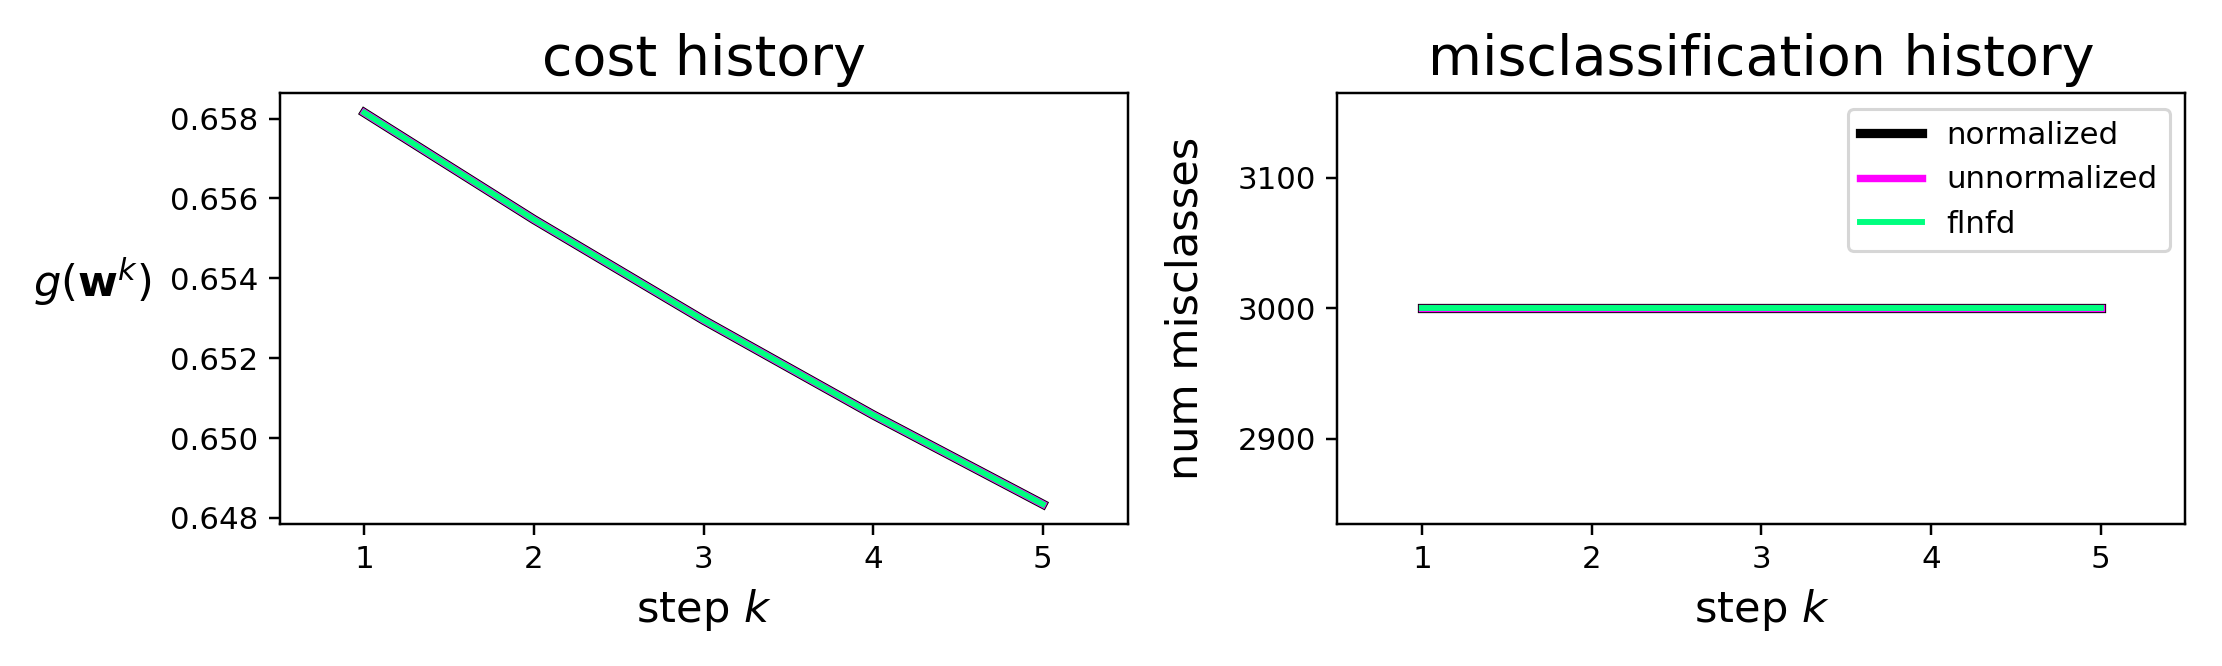

In [210]:
# plot cost history
demo.show_histories(start = 1,labels=['normalized','unnormalized','flnfd'])

# two-class classification

In [125]:
# load data
csvname = datapath + 'deeplearning_library_datasets/signed_projectile.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
demo = superlearn_setup.Setup(x,y)

# choose features
demo.choose_features(name = 'multilayer_perceptron', layer_sizes = [1,10,10,10,10,1],activation = 'tanh')

# choose normalizer
demo.choose_normalizer(name = 'standard')

# choose cost
demo.choose_cost(name = 'softmax')

In [126]:
# fit an optimization
demo.fit(max_its = 1000,alpha_choice = 10**(-1), version='unnormalized')

In [127]:
# fit an optimization
demo.fit(max_its = 1000,alpha_choice = 5*10**(-1), version='unnormalized')

In [128]:
# fit an optimization
demo.fit(max_its = 1000,alpha_choice = 10**(0), version='unnormalized')

<IPython.core.display.Javascript object>


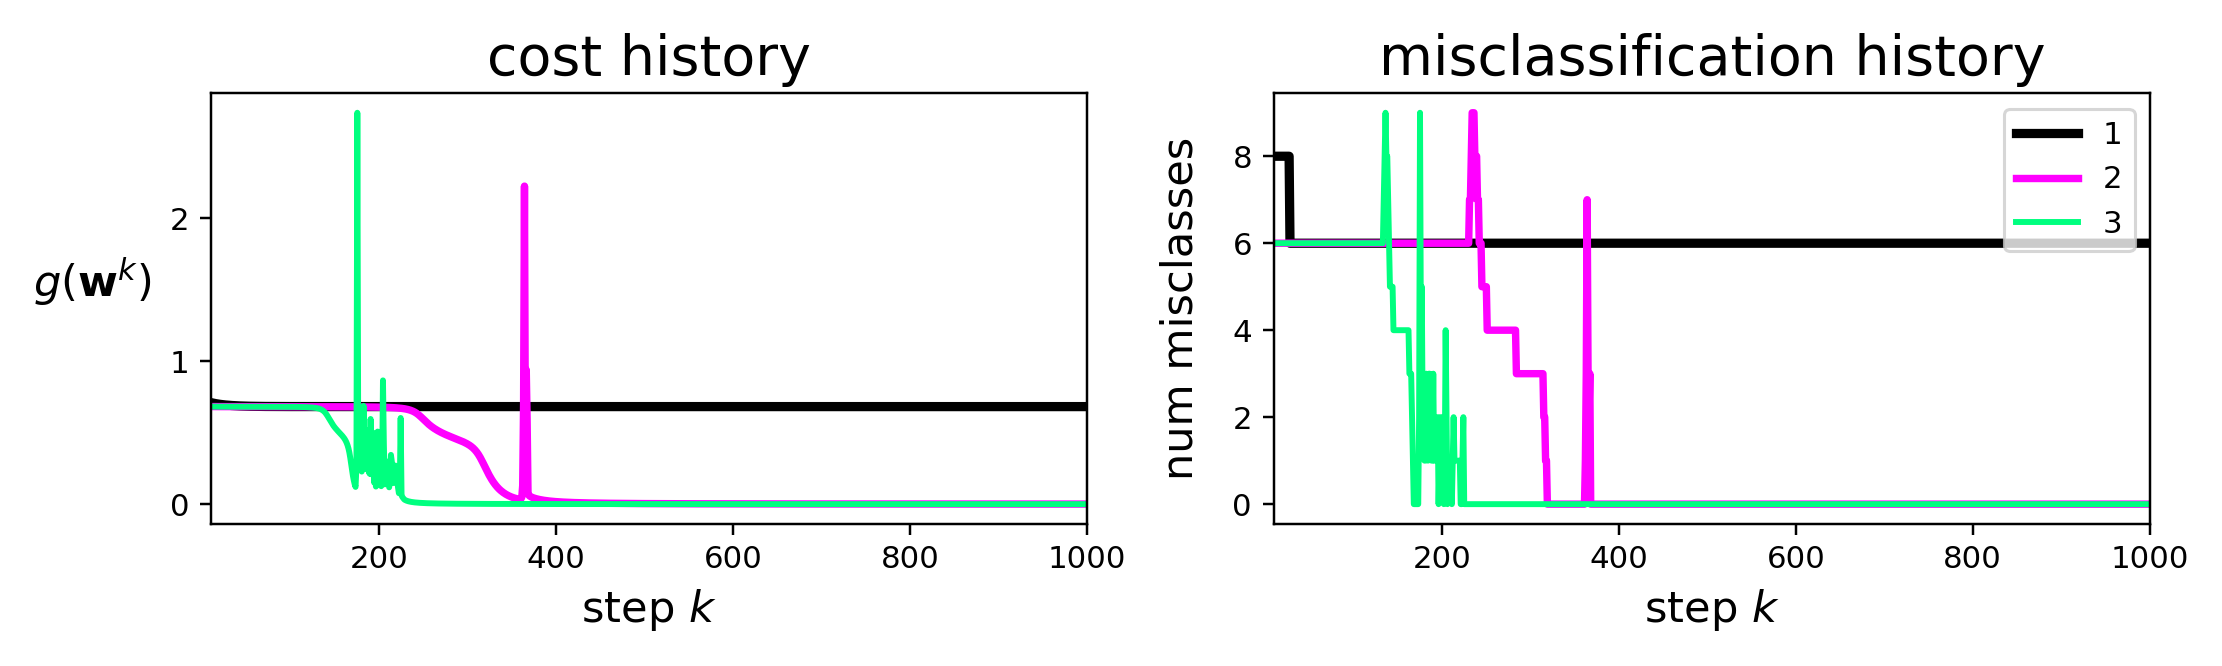

In [129]:
# plot cost history
demo.show_histories(start = 10,labels=['1','2','3'])

# Multiclass classification

In [95]:
csvname = datapath + 'deeplearning_library_datasets/3_layercake_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

<IPython.core.display.Javascript object>


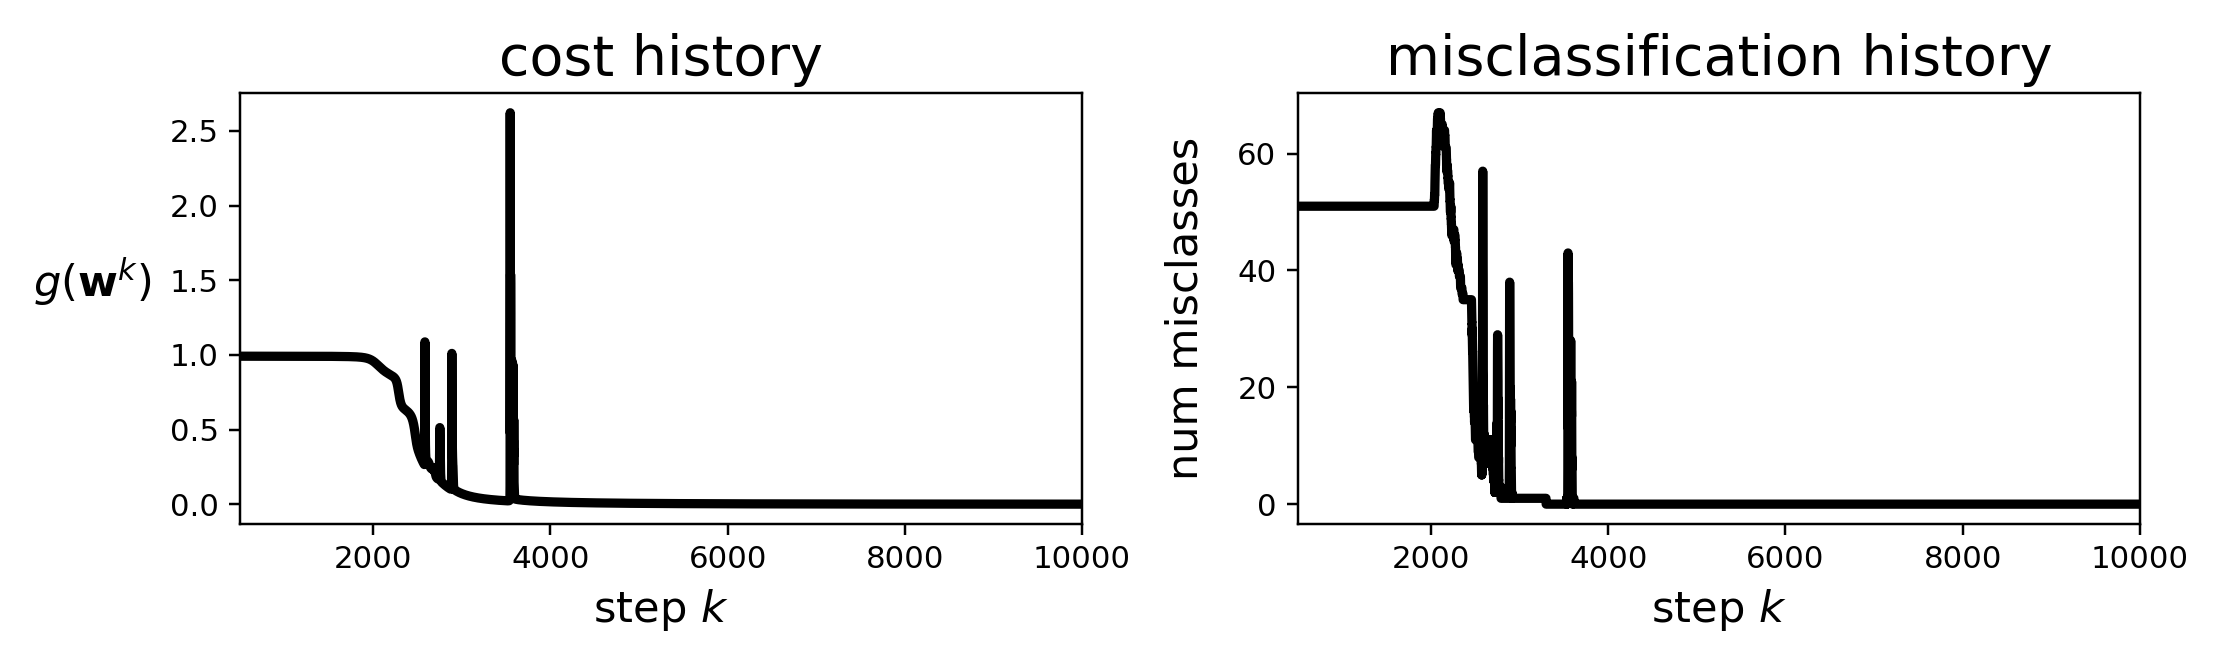

/Users/reza/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [102]:
# import the v1 library
demo = superlearn_setup.Setup(x,y)

# choose features
demo.choose_features(name = 'multilayer_perceptron',layer_sizes = [2,10,10,10,10,3],activation = 'tanh')

# choose normalizer
demo.choose_normalizer(name = 'standard')

# choose cost
demo.choose_cost(name = 'multiclass_softmax')

# fit an optimization
demo.fit(max_its = 10000,alpha_choice = 10**(-1),version='unnormalized')

# plot cost history
demo.show_histories(start = 500)